In [3]:
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                  
import cv2             
import tensorflow as tf                          
from PIL import Image                           
import os                                        


In [5]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical          
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [6]:
!pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 1.1 MB/s eta 0:00:00


In [7]:
import tqdm                                    
import warnings

In [10]:
os.getcwd()

'c:\\Users\\ajeet\\Desktop\\Vivek pr\\archive'

In [11]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'train',str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 65s 66ms/step - loss: 0.5356 - accuracy: 0.8415 - val_loss: 0.1380 - val_accuracy: 0.9635
Epoch 2/2
981/981 [==============================] - 68s 69ms/step - loss: 0.3386 - accuracy: 0.9038 - val_loss: 0.1422 - val_accuracy: 0.9610


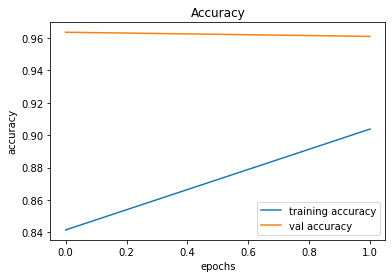

In [36]:
model.save("Trafic_signs_model.h5")
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

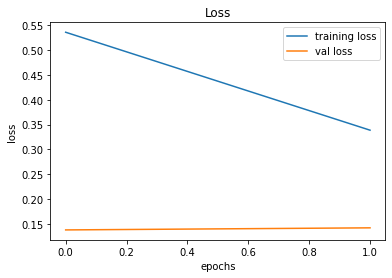

In [37]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)
#Accuracy with the test data
print(accuracy_score(labels, pred))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [4]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy

from keras.models import load_model
import warnings
window = Tk()

model = load_model('Trafic_signs_model.h5')
warnings.filterwarnings("ignore", category=DeprecationWarning)

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }
           
window.geometry('600x500')
window.title('Traffic sign classifier')

window.configure(background='#1e3e64')

heading = Label(window, text="Traffic Sign Classifier",padx=220, font=('Verdana',20,'bold'))
heading.configure(background='#143953',foreground='white')
heading.pack()

sign = Label(window)
sign.configure(background='#1e3e64')

value = Label(window,font=('Helvetica',15,'bold'))
value.configure(background='#1e3e64')

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    #print(image.shape)
    pred = model.predict(image)
    pred1 =pred
    pred1 = numpy.max(pred)
    
    pred = numpy.argmax(pred)
    print(pred)
    sign = classes[pred+1]
    #sign = classes[pred+1]
    print(sign)
    value.configure(foreground='#ffffff', text=sign)

def show_cb(file_path):
    classify_b=Button(window,text="Classify Image",command=lambda: classify(file_path),padx=20,pady=5)
    classify_b.configure(background='#147a81', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.6,rely=0.80)
    
def uploader():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((window.winfo_width()/2.25),(window.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)
        
        sign.configure(image=im)
        sign.image=im
        value.configure(text='')
        show_cb(file_path)
    except:
        pass

upload = Button(window,text="Upload an image",command=uploader,padx=10,pady=5)
upload.configure(background='#e8d08e', foreground='#143953',font=('arial',10,'bold'))
upload.pack()
upload.place(x=100, y=400)

sign.pack()
sign.place(x=230,y=100)
value.pack()
value.place(x=240,y=300)

window.mainloop()    

In [ ]:
from numpy import load

In [ ]:

data = load('faces-dataset_v654train.npz')

In [ ]:
trainx, trainy = data['arr_0'], data['arr_1']

In [ ]:

data1 = load('faces-dataset_v2val.npz')
testx, testy = data1['arr_0'], data1['arr_1']

In [ ]:
#trainx, testx, trainy, testy = train_test_split(trainx, trainy, test_size=0.3, random_state=10)

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(3337, 224, 224, 3)
No. of Training Dataset Labels: 3337


In [ ]:
print('Validation Dataset Shape: ­{}'.format(testx.shape))
print('No. of Validation Dataset Labels: {}'.format(len(testy)))

Validation Dataset Shape: ­(1100, 224, 224, 3)
No. of Validation Dataset Labels: 1100


In [ ]:



training_images= trainx/255.0

training_images = trainx.reshape((3337,224,224,3))

print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))


Training Dataset Shape: ­(3337, 224, 224, 3)
No. of Training Dataset Labels: 3337


In [ ]:
test_images=testx/255.0
valy=testy
valx = testx.reshape((1100,224,224,3)) 
print('Test Dataset Shape: {}'.format(valx.shape))
print('No. of Test Dataset Labels: {}'.format(len(valy)))

Test Dataset Shape: (1100, 224, 224, 3)
No. of Test Dataset Labels: 1100


In [ ]:
import os
import numpy as np
import scipy.io
import cv2
from tensorflow.keras.utils import to_categorical

In [ ]:
for i in range(0,3337):
  if (trainy[i]=='AJEET'):
    trainy[i]=0
  if (trainy[i]=='MANEESH'):
    trainy[i]=1
  if (trainy[i]=='PRANJAL'):
    trainy[i]=2
  if (trainy[i]=='PRASHANT'):
    trainy[i]=3
  if (trainy[i]=='RAJ'):
    trainy[i]=4
  

In [ ]:

trainy[90]

'0'

In [ ]:
for i in range(0,1100):
  if (valy[i]=='AJEET'):
    valy[i]=0
  if (valy[i]=='MANEESH'):
    valy[i]=1
  if (valy[i]=='PRANJAL'):
    valy[i]=2
  if (valy[i]=='PRASHANT'):
    valy[i]=3
  if (valy[i]=='RAJ'):
    valy[i]=4
  

In [ ]:
len(valy[0])

1

In [ ]:
trainy = to_categorical(trainy)
valy = to_categorical(valy)

[0. 0. 0. 0. 1.]


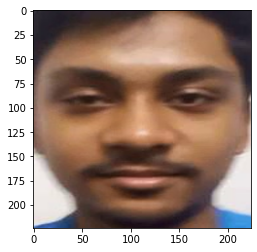

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[3200])
print(trainy[3200])

In [ ]:
trainy.shape

(3337, 5)

In [ ]:
 
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = Sequential()
 
#add model layers
 
 
# #Layer 1
model.add(Conv2D(64, kernel_size=3, strides=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
 
# #Layer 2
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

# #Layer 3
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
 

# #Layer 4
model.add(Conv2D(512, kernel_size=3, activation='relu'))
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

# #Layer 5
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
#model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

# #Input to Neural Network is flattened
model.add(Flatten())

# #1st hidden layer with 512 neurons/nodes
#model.add(Dense(36, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# #Output layer with 102 nodes for classifying 102 flowers
model.add(Dense(5, activation='softmax'))
 
 

 


In [ ]:
#Compile the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                 

In [ ]:
#Train the network
model.fit(trainx, trainy, validation_data = (valx, valy), epochs=10, batch_size=32)     #  

Epoch 1/10
 78/105 [=====================>........] - ETA: 3:11 - loss: 1.4034 - accuracy: 0.4183

In [ ]:
 model.save('cnn_layer100.h5')
print('model saved')

model saved


In [ ]:
from keras.models import load_model
model = load_model("cnn_layer1.h5")
 
score = model.evaluate(valx, valy)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
 

pred = model.predict(valx) 
pred = np.argmax(pred, axis = 1)[:4]
label = np.argmax(valy,axis = 1)[:4]
 
print("Predicted labels:",pred) 
print("Actual Labels:   ",label)

39/39 [==============================] - 2s 33ms/step - loss: 0.0208 - accuracy: 0.9959
Test loss: 0.02078174240887165
Test accuracy: 0.9959316253662109
Predicted labels: [0 1 0 1]
Actual Labels:    [0 1 0 1]


In [ ]:
valx.shape

(1229, 224, 224, 3)

In [ ]:
pred = model.predict(valx) 

In [ ]:

valx = valx[:1] 

#Predict output on sample input data
pred = model.predict(valx) 



In [ ]:
pred 

array([[1.0000000e+00, 4.2941234e-25, 6.4665981e-29, 1.9938010e-33,
        1.0453700e-26]], dtype=float32)

In [ ]:
model1 = load_model("Testing_keras.h5")

In [ ]:
model1.predict(valx[:90])

array([[9.8126847e-01, 1.5896320e-02, 1.5241159e-04, 2.6827969e-03]],
      dtype=float32)

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.6 MB/s 


In [ ]:
import efficientnet.keras as efn

In [ ]:
from keras import ImageDataGenerator

In [ ]:
train_dir = 

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

In [ ]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')